In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output, display
import time
from matplotlib.animation import FuncAnimation


In [2]:
class Person:
    def __init__(self, white, tolerance):
        self.white = white
        self.tolerance = tolerance
        self.happy = False
        
    def __repr__(self):
        return f'{1 if self.white else 2}'


# data type for np martix
person_dtype = np.dtype([
    ('person', object),
])

    

In [3]:
def prepare_matrix(rows=50, cols=50, density=0.8, tolerance=0.5):
    n = int(rows * cols)    
    blacks = []
    whites = []
    for i in range(int((density / 2) * n)):
        blacks.append(Person(False, tolerance))
        whites.append(Person(True, tolerance))
    empty = np.full(n - len(blacks) - len(whites), 0)
    array = np.concatenate((blacks, whites, empty))
    np.random.shuffle(array)
    matrix = array.reshape((rows, cols))
    return matrix

In [4]:
def update_hapiness(matrix):
    rows = matrix.shape[0]
    cols = matrix.shape[1]
    for row in range(rows):
        for col in range(cols):
            person = matrix[row, col]
            if not person:
                continue
            white = person.white
            same_color_neighbours = -1
            for i in range(-1, 2):
                for j in range(-1, 2):
                    neighbour = matrix[(row + i) % rows, (col + j) % cols]
                    if not neighbour:
                        continue
                    if not (neighbour.white ^ white):
                        same_color_neighbours += 1
            person.happy = (same_color_neighbours / 8) >= person.tolerance
    

In [5]:
def relocate_unhappy(matrix):
    rows = matrix.shape[0]
    cols = matrix.shape[1]
    unhappy = []
    empty_spots = []
    for row in range(rows):
        for col in range(cols):
            person = matrix[row, col]
            if not person:
                empty_spots.append((row, col))
            elif not person.happy:
                unhappy.append((person, (row, col)))
    np.random.shuffle(unhappy)
    np.random.shuffle(empty_spots)
    for unhappy_person in unhappy:
        matrix[empty_spots[-1][0], empty_spots[-1][1]] = unhappy_person[0]
        empty_spots.pop()
        matrix[unhappy_person[1]] = 0
        empty_spots.insert(random.randint(0, len(empty_spots)), unhappy_person[1])
    

In [6]:
def check_hapiness(matrix):
    rows = matrix.shape[0]
    cols = matrix.shape[1]
    for row in range(rows):
        for col in range(cols):
            person = matrix[row, col]
            if not person:
                continue
            elif not person.happy:
                return False
    return True

In [7]:
def display_matrix(matrix):
    # Create a numpy array for the colors
    color_matrix = []
    for row in matrix:
        new_row = []
        for cell in row:
            if isinstance(cell, Person):
                new_row.append(cell.white + 1)
            else:
                new_row.append(0)
        color_matrix.append(new_row)    
    # Create a figure and axis
    fig, ax = plt.subplots()
    
    # Create a colormap with custom colors
    cmap = plt.cm.colors.ListedColormap(['white', 'red', 'blue'])
    
    # Plot the color matrix
    cax = ax.matshow(color_matrix, cmap=cmap)
    
    # Add color bar legend
    cbar = plt.colorbar(cax, ticks=[0, 1, 2])
    cbar.set_ticklabels(['Empty', 'Red', 'Blue'])
    
    # Display the plot
    plt.show()

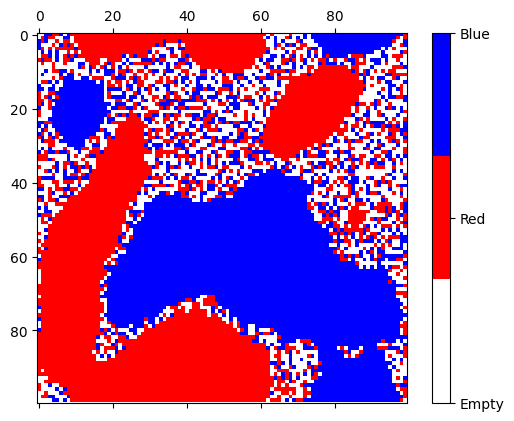

In [ ]:
x = prepare_matrix(100,100,0.8,0.6)
display_matrix(x)
clear_output(wait=True)

time.sleep(3)
while not check_hapiness(x):
    update_hapiness(x)
    relocate_unhappy(x)
    display_matrix(x)
    clear_output(wait=True)
plt.show()